In [1]:
from torch.autograd import Variable
import torch
import numpy as np
import matplotlib.pyplot as plt



from scipy.io import loadmat



%matplotlib inline  

M = loadmat("mnist_all.mat")



def get_test(M):
    batch_xs = np.zeros((0, 28*28))
    batch_y_s = np.zeros( (0, 10))
    
    test_k =  ["test"+str(i) for i in range(10)]
    for k in range(10):
        batch_xs = np.vstack((batch_xs, ((np.array(M[test_k[k]])[:])/255.)  ))
        one_hot = np.zeros(10)
        one_hot[k] = 1
        batch_y_s = np.vstack((batch_y_s,   np.tile(one_hot, (len(M[test_k[k]]), 1))   ))
    return batch_xs, batch_y_s


def get_train(M):
    batch_xs = np.zeros((0, 28*28))
    batch_y_s = np.zeros( (0, 10))
    
    train_k =  ["train"+str(i) for i in range(10)]
    for k in range(10):
        batch_xs = np.vstack((batch_xs, ((np.array(M[train_k[k]])[:])/255.)  ))
        one_hot = np.zeros(10)
        one_hot[k] = 1
        batch_y_s = np.vstack((batch_y_s,   np.tile(one_hot, (len(M[train_k[k]]), 1))   ))
    return batch_xs, batch_y_s
        

train_x, train_y = get_train(M)
test_x, test_y = get_test(M)



train_x, train_y = get_train(M)
test_x, test_y = get_test(M)

dim_x = 28*28
dim_h = 20
dim_out = 10

dtype_float = torch.FloatTensor
dtype_long = torch.LongTensor



################################################################################
#Subsample the training set for faster training

train_idx = np.random.permutation(range(train_x.shape[0]))[:1000]
x = Variable(torch.from_numpy(train_x[train_idx]), requires_grad=False).type(dtype_float)
y_classes = Variable(torch.from_numpy(np.argmax(train_y[train_idx], 1)), requires_grad=False).type(dtype_long)
#################################################################################


`x`, `y`, and `y_classes` are PyTorch Variables. We will now define the neural network model. We'll use `toch.nn.Sequential`

In [2]:
model = torch.nn.Sequential(
    torch.nn.Linear(dim_x, dim_h),
    torch.nn.ReLU(),
    torch.nn.Linear(dim_h, dim_out),
)

`model` can be used to apply the network to `Variable` inputs.

We'll define a loss function using `torch.nn.CrossEntropyLoss()`, which computes the cross entropy from the logits  of the class probability (i.e., outputs of the softmax) and the class labels (i.e., the average negative log-probability of the correct answer).

In [3]:
loss_fn = torch.nn.CrossEntropyLoss()

### Training the model

We will now use Adam, a variant of Gradient Descent, to optimize the model

In [4]:
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(10000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_classes)
    
    model.zero_grad()  # Zero out the previous gradient computation
    loss.backward()    # Compute the gradient
    optimizer.step()   # Use the gradient information to 
                       # make a step

Now, let's make predictions for the test set

In [5]:
x = Variable(torch.from_numpy(test_x), requires_grad=False).type(dtype_float)

In [6]:
y_pred = model(x).data.numpy()

Let's now look at the performance:

In [7]:
np.mean(np.argmax(y_pred, 1) == np.argmax(test_y, 1))

0.8659

Let's explore the weights a little bit. We can access the weights like this:

In [8]:
model[0].weight

Parameter containing:
-2.0031e-02  5.9954e-03  2.6498e-02  ...  -4.2655e-03  2.8751e-02 -3.4611e-02
 5.5479e-03  1.5573e-02 -2.3921e-03  ...  -2.2186e-02  1.5073e-02 -1.8595e-02
-2.0933e-02  3.0279e-02  2.4411e-02  ...   1.1015e-02  6.2329e-03  2.2660e-02
                ...                   ⋱                   ...                
-2.4657e-02  6.8010e-03 -9.3225e-03  ...   1.4684e-02  1.3183e-02  3.0334e-02
 1.4144e-02  1.0858e-02  6.4446e-03  ...  -7.6519e-03  6.5641e-03 -9.8604e-03
 7.7400e-03 -3.2873e-02 -3.3913e-02  ...  -1.2442e-02 -5.5309e-03  1.4210e-02
[torch.FloatTensor of size 20x784]

Let's look at the weights associated with unit 10

In [9]:
model[0].weight.data.numpy()[10, :].shape

(784,)

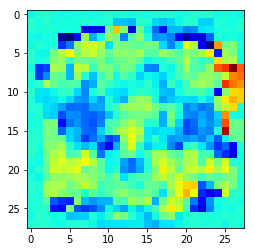

In [10]:
plt.imshow(model[0].weight.data.numpy()[10, :].reshape((28, 28)), cmap=plt.cm.jet)

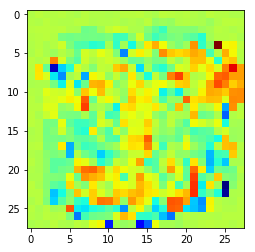

In [11]:
plt.imshow(model[0].weight.data.numpy()[12, :].reshape((28, 28)), cmap=plt.cm.jet)